<a href="https://colab.research.google.com/github/saicham/Study/blob/main/(8days)2024ICT_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')

#     # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [9]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [5]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [6]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

## RNN모델링

In [10]:
num_features = 20
timesteps = 120

In [15]:
model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(timesteps, num_features), return_sequences=False))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 16)                  │             592 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592 (2.31 KB)

 Trainable params: 592 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(timesteps, num_features), return_sequences=True))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 120, 16)             │             592 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592 (2.31 KB)

 Trainable params: 592 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

## 시점별 출력되는 내용 확인
### 2차원 데이터
### 문장길이(timestpes) : 4
### 단어벡터(input_dim) : 5

In [18]:
train_x = [
    [ 0.1, 4.2, 1.5, 1.1, 2.8 ],
    [ 1.0, 3.1, 2.5, 0.7, 1.1 ],
    [ 0.3, 2.1, 1.5, 2.1, 0.1 ],
    [ 2.2, 1.4, 0.5, 0.9, 1.1 ]
]
train_x = np.array(train_x)
train_x.shape

(4, 5)

## 시점별 출력되는 내용 확인
### 3차원 데이터
### batch_size : 1
### 문장길이(timestpes) : 4
### 단어벡터(input_dim) : 5
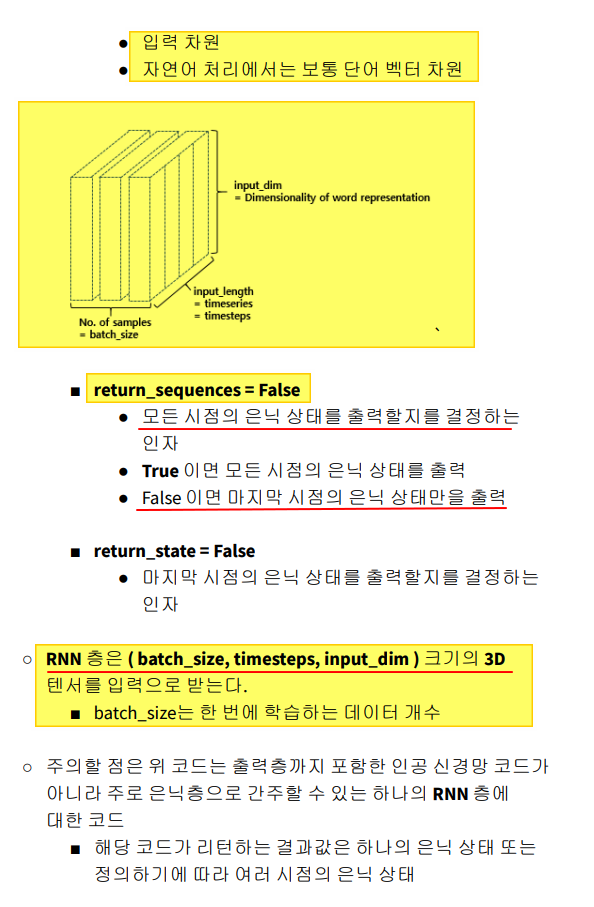

In [22]:
train_x = [  # 배치사이즈, 문장 갯수(timesteps), 단어벡터 갯수(input_dim)
    [
    [ 0.1, 4.2, 1.5, 1.1, 2.8 ],
    [ 1.0, 3.1, 2.5, 0.7, 1.1 ],
    [ 0.3, 2.1, 1.5, 2.1, 0.1 ],
    [ 2.2, 1.4, 0.5, 0.9, 1.1 ]
    ]
]
train_x = np.array(train_x, dtype=np.float32)
train_x.shape

(1, 4, 5)

## 마지막 시점 은닉상태 출력

In [29]:
rnn = SimpleRNN(3, return_sequences=False, return_state=False)
hidden_state = rnn(train_x)
print(hidden_state)
print(hidden_state.shape)

tf.Tensor([[-0.9922842  -0.9664361  -0.11816494]], shape=(1, 3), dtype=float32)
(1, 3)


## 모든 시점 은닉상태 출력

In [31]:
rnn = SimpleRNN(3, return_sequences=True, return_state=False)
hidden_state = rnn(train_x)
print(hidden_state)
print(hidden_state.shape)

tf.Tensor(
[[[-0.63742334 -0.96889126  0.43489334]
  [-0.96233517  0.5037832  -0.3796223 ]
  [ 0.02117841 -0.5884282   0.866182  ]
  [-0.8289831   0.6273404   0.49443048]]], shape=(1, 4, 3), dtype=float32)
(1, 4, 3)


## 모든 시점 은닉상태 출력 및 마지막 시점 은닉상태 출력

In [32]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_x)
print(hidden_states)
print(hidden_states.shape)
print('---'*3)
print(last_state)
print(last_state.shape)

tf.Tensor(
[[[ 0.99999785 -0.6672959  -0.686455  ]
  [ 0.9999982  -0.61121017  0.4344067 ]
  [ 0.9997936  -0.36680937 -0.6223832 ]
  [ 0.9999604   0.46710652 -0.7484132 ]]], shape=(1, 4, 3), dtype=float32)
(1, 4, 3)
---------
tf.Tensor([[ 0.9999604   0.46710652 -0.7484132 ]], shape=(1, 3), dtype=float32)
(1, 3)


## IMDB 영화 리뷰 데이터를 사용한 감성분류 모델

In [34]:
from tensorflow.keras.datasets import imdb

In [35]:
num_words = 10000 #빈도수가 높은 단어 10000개만 사용
(train_x, train_y),(test_x,test_y) = imdb.load_data(num_words = num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
print(f'train_data : {train_x.shape}')
print(f'train_y_data : {train_y.shape}')
print(f'test_data : {test_x.shape}')
print(f'test_y_data : {test_y.shape}')

train_data : (25000,)
train_y_data : (25000,)
test_data : (25000,)
test_y_data : (25000,)


In [42]:
print(train_x[0])
print(np.shape(train_x[0]))
print('---'*3)
print(train_y[0])
print(np.shape(train_y[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(218,)
---------
1
()


## 데이터 전처리
### One-Hot Encoding

In [46]:
def vector_sequence(sentence, dim = num_words):
  result= np.zeros((len(sentence), num_words))
  for idx, seq in enumerate(sentence):
    result[idx, seq] = 1
  return result

In [47]:
train_data = vector_sequence(train_x)
test_data = vector_sequence(test_x)

In [48]:
print(f'train_data : {train_data.shape}')
print(f'test_data : {test_data.shape}')

train_data : (25000, 10000)
test_data : (25000, 10000)


In [51]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_data